# Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# Importation des données

## File Description:

Istanbul_trafic_index.csv

This file contains daily traffic index data, capturing the minimum, maximum, and average traffic levels over a series of dates. The data is structured in four columns:

trafficindexdate: The date and time of traffic data recording.
minimum_traffic_index: The lowest traffic index observed on that date.
maximum_traffic_index: The highest traffic index observed on that date.
average_traffic_index: The mean traffic index for the entire day.

The dataset includes 3,288 entries and spans a range of dates from 2016 to 2024, providing a comprehensive overview of traffic fluctuations.

In [5]:
dt_trafic_data = pd.read_csv('Istanbul_trafic_data.csv', delimiter=';')
dt_trafic_data.head()

,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index
0,2022-08-14 00:00:00 +0000 +0000,1,38,17.551854
1,2016-09-23 00:00:00 +0000 +0000,2,76,36.892361
2,2019-03-31 00:00:00 +0000 +0000,1,18,4.699301
3,2024-06-13 00:00:00 +0000 +0000,1,81,43.719801
4,2019-01-12 00:00:00 +0000 +0000,6,54,28.329825


In [6]:
dt_trafic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trafficindexdate       3288 non-null   object 
 1   minimum_traffic_index  3288 non-null   int64  
 2   maximum_traffic_index  3288 non-null   int64  
 3   average_traffic_index  3288 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 102.9+ KB


# Analyse descriptive univariée

In [8]:
# Variable Quantitatives

dt_trafic_data.describe()

,minimum_traffic_index,maximum_traffic_index,average_traffic_index
count,3288.000000,3288.000000,3288.000000
mean,1.975365,60.785584,27.686715
std,2.672068,16.039613,8.209477
min,1.000000,4.000000,1.083916
25%,1.000000,53.000000,23.626627
50%,1.000000,63.000000,28.647213
75%,2.000000,72.000000,33.198622
max,58.000000,90.000000,59.428571


<Axes: >

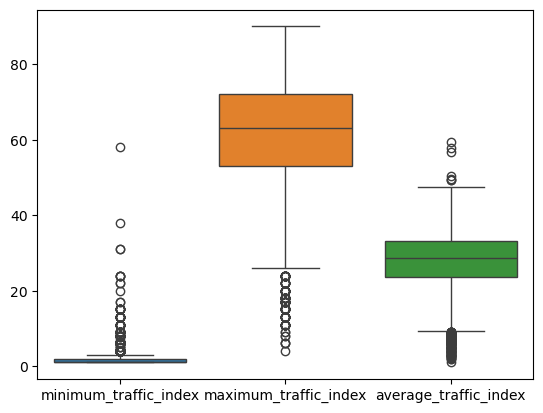

In [9]:
sn.boxplot(data=dt_trafic_data)

- Aucune des variables n'a de valeurs manquantes.
- Les 3 variables quantitaves ont plusieurs valeurs extrêmes ==> ne pas privilégier la moyenne.

In [11]:
dt_trafic_data.shape

(3288, 4)

In [12]:
# la variable trafficindexdate n'a que des valeurs uniques. transformation de cette variable en index
# sn.countplot(x=dt_trafic_data['trafficindexdate'])
# dt_trafic_data = dt_trafic_data.set_index('trafficindexdate')
# dt_trafic_data['date'] = dt_trafic_data['trafficindexdate'].apply(lambda x: x.split(" ")[0])
# dt_trafic_data

In [13]:
# Variable Qualitative

In [14]:
dt_trafic_data['dateOfWeek'] = pd.to_datetime(dt_trafic_data['trafficindexdate']).dt.dayofweek
dt_trafic_data['dateOfWeek'] =dt_trafic_data['dateOfWeek'].apply(str)
dt_trafic_data.head()

/var/folders/j7/07hxnrpx02v8v1w5dkhk65w00000gn/T/ipykernel_92305/2483342874.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt_trafic_data['dateOfWeek'] = pd.to_datetime(dt_trafic_data['trafficindexdate']).dt.dayofweek


,trafficindexdate,minimum_traffic_index,maximum_traffic_index,average_traffic_index,dateOfWeek
0,2022-08-14 00:00:00 +0000 +0000,1,38,17.551854,6
1,2016-09-23 00:00:00 +0000 +0000,2,76,36.892361,4
2,2019-03-31 00:00:00 +0000 +0000,1,18,4.699301,6
3,2024-06-13 00:00:00 +0000 +0000,1,81,43.719801,3
4,2019-01-12 00:00:00 +0000 +0000,6,54,28.329825,5


In [15]:
dt_trafic_data.describe(include='object')

,trafficindexdate,dateOfWeek
count,3288,3288
unique,3288,7
top,2022-08-14 00:00:00 +0000 +0000,4
freq,1,471


In [16]:
# analyse de la normalité

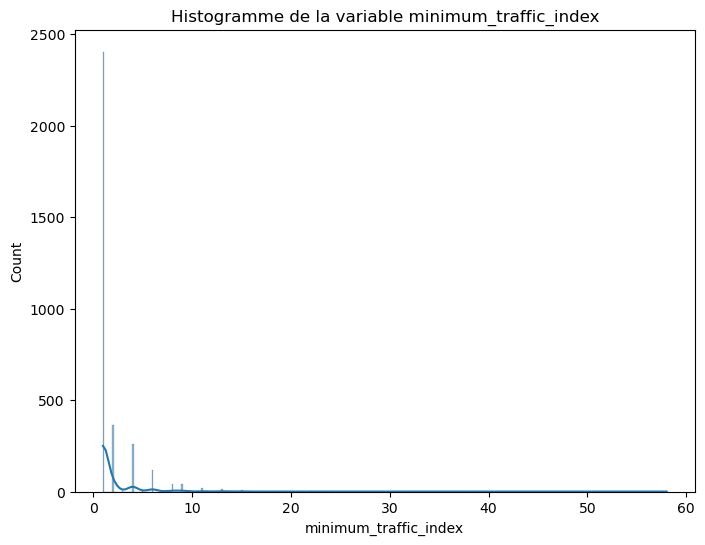

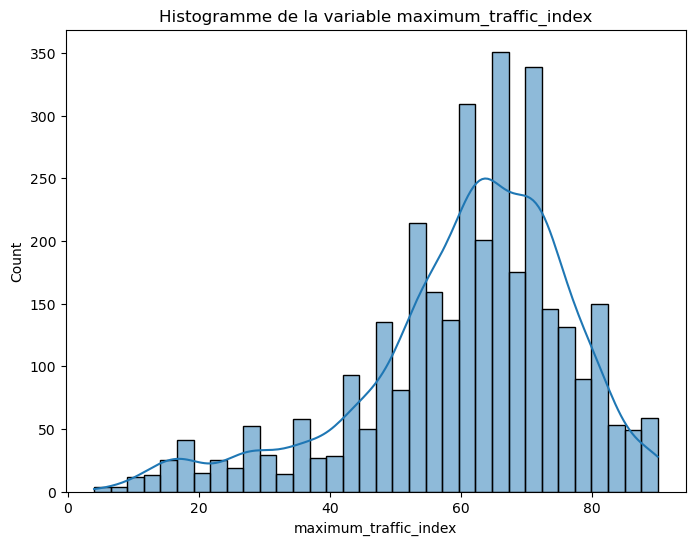

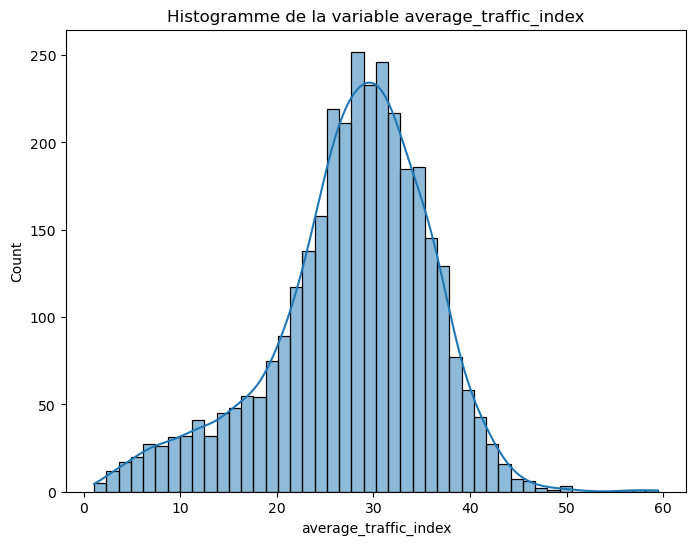

In [17]:
from scipy.stats import shapiro

# Sélection des variables quantitatives
quant_vars = dt_trafic_data.select_dtypes(include=['float64', 'int64'])

# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in quant_vars:
    plt.figure(figsize=(8, 6))
    sn.histplot(data=dt_trafic_data, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()

In [18]:
# Test de shapiro pour le test de normalité
# pd_result = pd.DataFrame(columns=['Variable', 'P-value', 'Normality'])

for col in quant_vars:
    stat, p_value = shapiro(quant_vars[col])
    if p_value > 0.05:
        print('La variable ' + col + '  suit une loi normale p_value = ' + str(p_value))
    else:
        print('La variable ' +  col + '  ne suit pas une loi normale p_value = ' + str(p_value))

La variable minimum_traffic_index  ne suit pas une loi normale p_value = 5.157236365681763e-74
La variable maximum_traffic_index  ne suit pas une loi normale p_value = 2.8079972052866754e-34
La variable average_traffic_index  ne suit pas une loi normale p_value = 1.7220885906842853e-26


<Axes: xlabel='dateOfWeek', ylabel='count'>

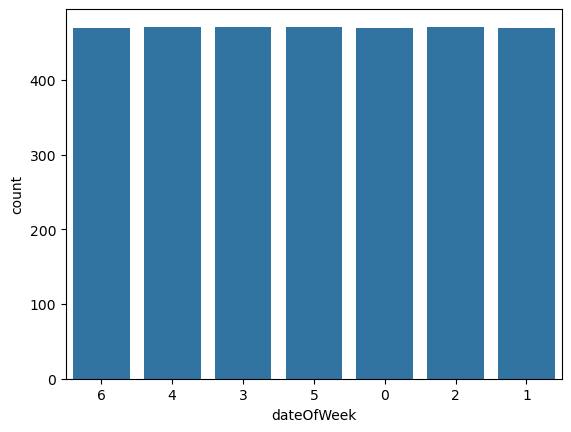

In [19]:
# Analyse de la variable qualitative

sn.countplot(x=dt_trafic_data['dateOfWeek'])

In [20]:
# Analyse multivariée

# relation entre variables quantitatives
#sn.pairplot(dt_trafic_data)

In [21]:
# tableau de corrélation et heatmap
corr_matrix = quant_vars.corr()
corr_matrix

,minimum_traffic_index,maximum_traffic_index,average_traffic_index
minimum_traffic_index,1.000000,0.058793,0.265478
maximum_traffic_index,0.058793,1.000000,0.895667
average_traffic_index,0.265478,0.895667,1.000000


In [22]:
#sn.pairplot(dt_trafic_data, hue = 'dateOfWeek')

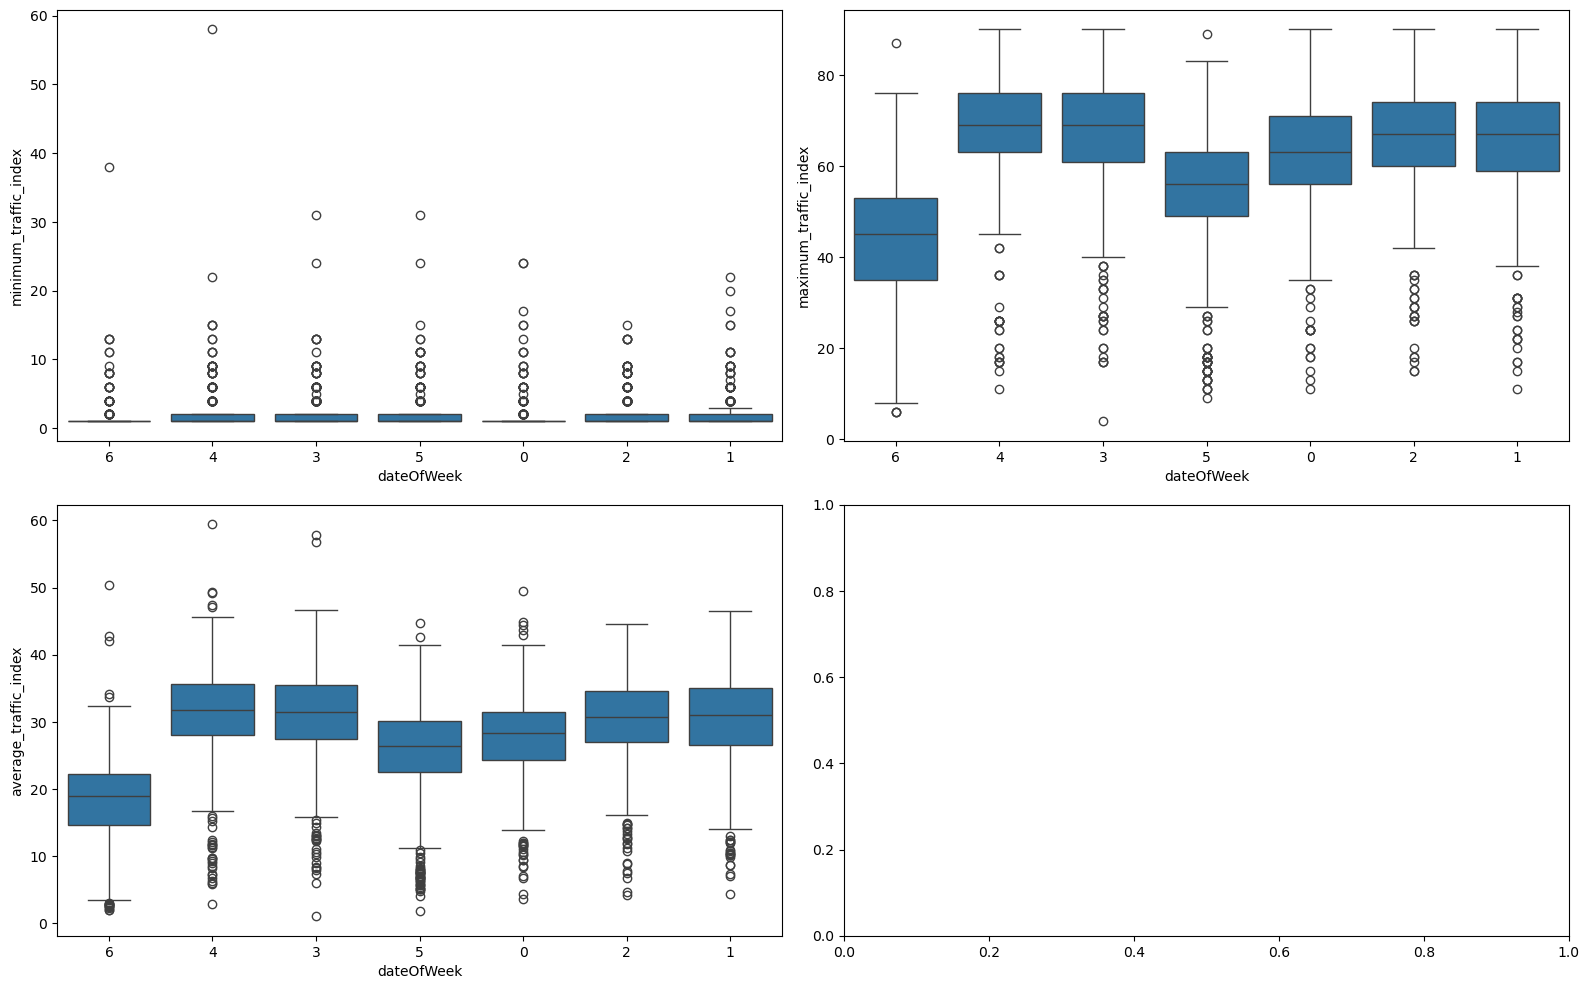

In [23]:
#Analyse des relations entre les variables et la variété de fleur

# Création des boxplots pour chaque variable en fonction de l'espèce de la fleur
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(quant_vars.columns)):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sn.boxplot(x = dt_trafic_data['dateOfWeek'], y = quant_vars[quant_vars.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()